<a href="https://colab.research.google.com/github/Tafzer96/ProjetDeepLearning/blob/master/ProjetDeepLearning_MouhamadouDIOP_MorLOUM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [0]:
#Mount the local drive project_forder
from google.colab import drive
drive.mount('/content/drive/')
!ls "/content/drive/My Drive/Deep Learning/house-prices-advanced-regression-techniques"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
data_description.txt  sample_submission.csv  test.csv  train.csv


In [0]:
train = pd.read_csv('/content/drive/My Drive/Deep Learning/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/content/drive/My Drive/Deep Learning/house-prices-advanced-regression-techniques/test.csv')

In [0]:
print(train.head())
print('**'* 50)
print(test.head())

   Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]
****************************************************************************************************
     Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0  1461          20       RH  ...    2010        WD        Normal
1  1462          20       RL  ...    2010        WD        Normal
2  1463          60       RL  ...    2010        WD        Normal
3  1464          60       RL  ...    2010        WD        Normal
4  1465         120       RL  ...    2010        WD        Normal

[5 rows x 80 columns]


In [0]:
print(train.info())
print('**'* 50)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# Data Visualization

Let's look at the point of visualization

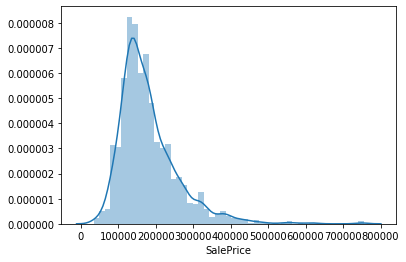

In [0]:
sns.distplot(train['SalePrice'])

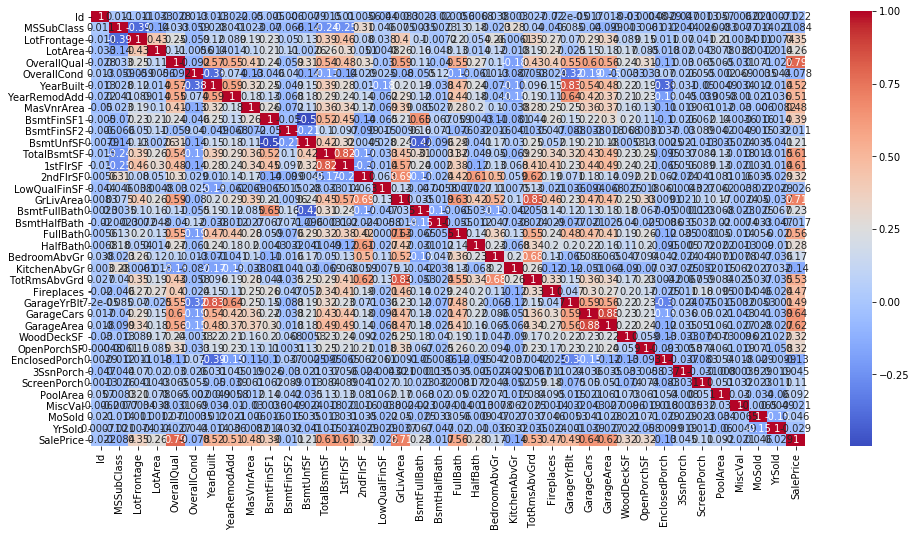

In [0]:
plt.figure(figsize=(16,8))
sns.heatmap(train.corr(),cmap='coolwarm',annot = True)
plt.show()

nous pouvons voir les paramètres les plus corrélés en valeurs numériques au-dessus du tracé. Et nous pouvons les choisir comme caractéristiques pour notre modèle d'apprentissage de la macine.

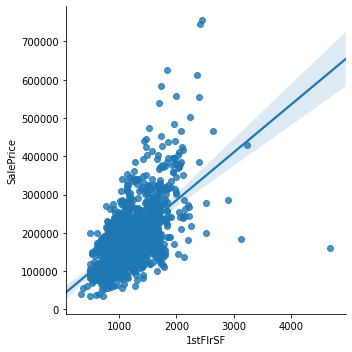

In [0]:
sns.lmplot(x='1stFlrSF',y='SalePrice',data=train) # 1stFlrSF seems very corelated with SalePrice.

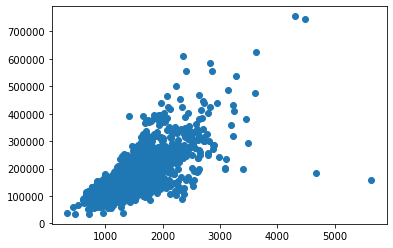

In [0]:
plt.scatter(x= 'GrLivArea', y='SalePrice', data = train)

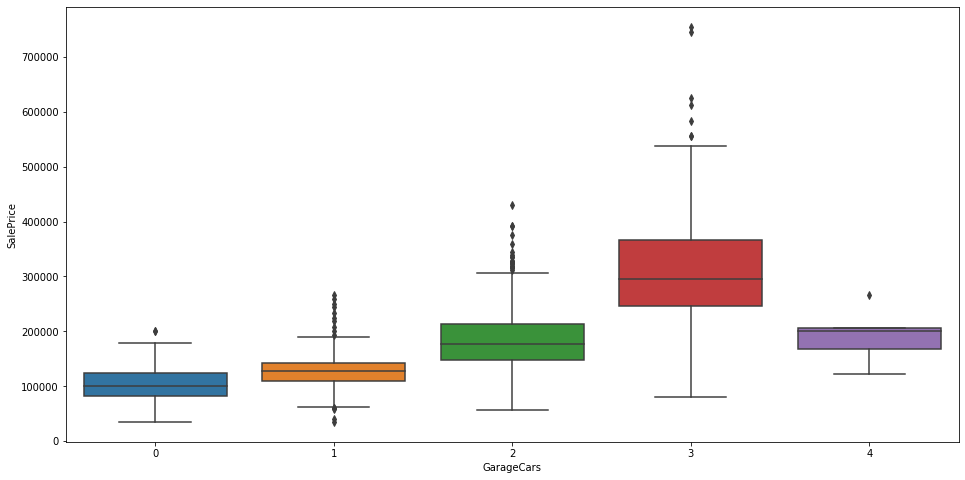

In [0]:
plt.figure(figsize=(16,8))
sns.boxplot(x='GarageCars',y='SalePrice',data=train)
plt.show()

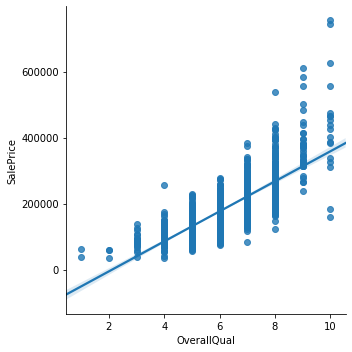

In [0]:
sns.lmplot(x='OverallQual',y='SalePrice',data=train)

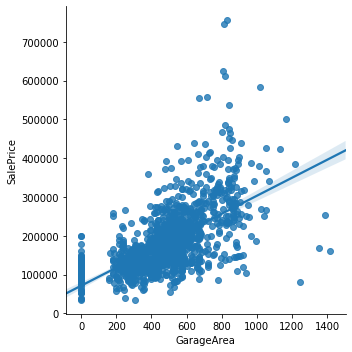

In [0]:
sns.lmplot(x='GarageArea',y='SalePrice',data=train)


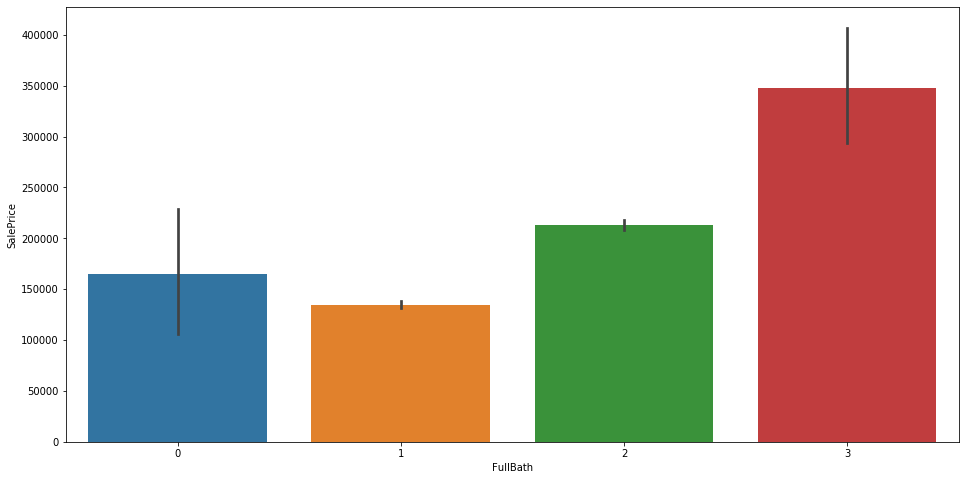

In [0]:
plt.figure(figsize=(16,8))
sns.barplot(x='FullBath',y = 'SalePrice',data=train)
plt.show()

# Feature Engineering

Nous devons convertir toutes les colonnes en données numériques ou catégorielles.

In [0]:
#données manquantes 
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


Comme on peut le voir, certains paramètres ont beaucoup de valeurs manquantes. C'est pourquoi nous devrions les supprimer des données. Et nous allons laisser tomber les paramètres dont la valeur totale est supérieure à 81.

In [0]:
#le traitement des données manquantes
train = train.drop((missing_data[missing_data['Total'] > 81]).index,1)

In [0]:
train.isnull().sum().sort_values(ascending=False).head(20)

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageCond      81
GarageQual      81
BsmtExposure    38
BsmtFinType2    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
MasVnrType       8
MasVnrArea       8
Electrical       1
RoofMatl         0
RoofStyle        0
SalePrice        0
Exterior1st      0
Exterior2nd      0
YearBuilt        0
ExterQual        0
dtype: int64

Nous allons faire la même chose pour les données de test

In [0]:
#le traitement des données manquantes
total_test = test.isnull().sum().sort_values(ascending=False)
percent_test = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_test, percent_test], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


In [0]:
#le traitement des données manquantes
test = test.drop((missing_data[missing_data['Total'] > 78]).index,1)

In [0]:
test.isnull().sum().sort_values(ascending=False).head(20)

GarageYrBlt     78
GarageFinish    78
GarageCond      78
GarageQual      78
GarageType      76
BsmtCond        45
BsmtQual        44
BsmtExposure    44
BsmtFinType1    42
BsmtFinType2    42
MasVnrType      16
MasVnrArea      15
MSZoning         4
BsmtHalfBath     2
Functional       2
Utilities        2
BsmtFullBath     2
Exterior2nd      1
Exterior1st      1
KitchenQual      1
dtype: int64

In [0]:
train.isnull().sum().sort_values(ascending = False)

GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageCond       81
GarageQual       81
                 ..
CentralAir        0
HeatingQC         0
SaleCondition     0
TotalBsmtSF       0
Id                0
Length: 75, dtype: int64

nous devons traiter les données manquantes.

In [0]:
# Masque booléen catégorique
categorical_feature_mask = train.dtypes==object
# filtrer les colonnes catégorielles à l'aide d'un masque et les transformer en alistes
categorical_cols = train.columns[categorical_feature_mask].tolist()

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train[categorical_cols] = train[categorical_cols].apply(lambda col: labelencoder.fit_transform(col.astype(str)))

In [0]:
# Masque booléen catégorique
categorical_feature_mask_test = test.dtypes==object
# filtrer les colonnes catégorielles à l'aide d'un masque et les transformer en alistes
categorical_cols_test = test.columns[categorical_feature_mask_test].tolist()

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
test[categorical_cols_test] = test[categorical_cols_test].apply(lambda col: labelencoder.fit_transform(col.astype(str)))

In [0]:
train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,0,12,2008,8,4,250000


In [0]:
test.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,11622,1,3,3,0,4,0,12,1,2,0,2,5,6,1961,1961,1,0,10,12,2,0.0,3,4,1,3,3,3,4,468.0,3,144.0,270.0,882.0,0,4,1,3,896,0,0,896,0.0,0.0,1,0,2,1,3,5,6,0,1,1961.0,2,1.0,730.0,3,4,2,140,0,0,0,120,0,0,6,2010,8,4
1,1462,20,3,14267,1,0,3,0,0,0,12,2,2,0,2,6,6,1958,1958,3,0,11,13,1,108.0,3,4,1,3,3,3,0,923.0,5,0.0,406.0,1329.0,0,4,1,3,1329,0,0,1329,0.0,0.0,1,1,3,1,2,6,6,0,1,1958.0,2,1.0,312.0,3,4,2,393,36,0,0,0,0,12500,6,2010,8,4
2,1463,60,3,13830,1,0,3,0,4,0,8,2,2,0,4,5,5,1997,1998,1,0,10,12,2,0.0,3,4,2,2,3,3,2,791.0,5,0.0,137.0,928.0,0,2,1,3,928,701,0,1629,0.0,0.0,2,1,3,1,3,6,6,1,1,1997.0,0,2.0,482.0,3,4,2,212,34,0,0,0,0,0,3,2010,8,4
3,1464,60,3,9978,1,0,3,0,4,0,8,2,2,0,4,6,6,1998,1998,1,0,10,12,1,20.0,3,4,2,3,3,3,2,602.0,5,0.0,324.0,926.0,0,0,1,3,926,678,0,1604,0.0,0.0,2,1,3,1,2,7,6,1,1,1998.0,0,2.0,470.0,3,4,2,360,36,0,0,0,0,0,6,2010,8,4
4,1465,120,3,5005,1,0,1,0,4,0,22,2,2,4,2,8,5,1992,1992,1,0,6,6,2,0.0,2,4,2,2,3,3,0,263.0,5,0.0,1017.0,1280.0,0,0,1,3,1280,0,0,1280,0.0,0.0,2,0,2,1,2,5,6,0,1,1992.0,1,2.0,506.0,3,4,2,0,82,0,0,144,0,0,1,2010,8,4


In [0]:
train.isnull().sum().sort_values(ascending=False).head(20)

GarageYrBlt     81
MasVnrArea       8
ExterCond        0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
SalePrice        0
YearRemodAdd     0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
Foundation       0
YearBuilt        0
dtype: int64

In [0]:
test.isnull().sum().sort_values(ascending=False).head(20)

GarageYrBlt     78
MasVnrArea      15
BsmtFullBath     2
BsmtHalfBath     2
TotalBsmtSF      1
GarageArea       1
BsmtUnfSF        1
BsmtFinSF1       1
GarageCars       1
BsmtFinSF2       1
LandSlope        0
Neighborhood     0
MSSubClass       0
BsmtFinType1     0
BsmtExposure     0
BsmtCond         0
BsmtQual         0
Foundation       0
ExterCond        0
ExterQual        0
dtype: int64

In [0]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mean())

Now we are going to pick some features for the model. For this we are going to use correlation matrix and we are going to pick most correlated with sale price.

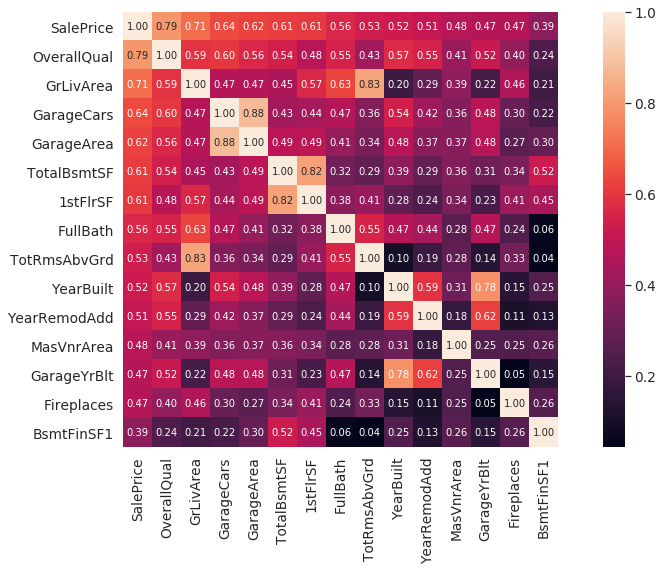

In [0]:
#saleprice correlation matrix
k = 15 
plt.figure(figsize=(16,8))
corrmat = train.corr()
# en choisissant les 15 caractéristiques corrélées les plus importantes
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [0]:
train = train[cols]

In [0]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'GarageYrBlt', 'Fireplaces',
       'BsmtFinSF1'],
      dtype='object')

In [0]:
test=test[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1']]

In [0]:
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(test['GarageYrBlt'].mean())
test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].mean())
test['GarageCars'] = test['GarageCars'].fillna(test['GarageCars'].mean())
test['GarageArea'] = test['GarageArea'].fillna(test['GarageArea'].mean())
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean())
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())

<a id="1"></a> <br>
# **Linear Regression **

Commençons maintenant à former notre modèle de régression ! Nous devrons d'abord diviser nos données en un tableau X qui contient les caractéristiques sur lesquelles nous devons nous entraîner, et un tableau y avec la variable cible, dans ce cas la colonne Prix. Nous jetterons la colonne Adresse car elle ne contient que des informations textuelles que le modèle de régression linéaire ne peut pas utiliser.

<a id="1"></a> <br>
### **Train Test Split **
Divisons maintenant les données en un ensemble de formation et un ensemble de test. Nous allons former le modèle sur l'ensemble de formation, puis utiliser l'ensemble de test pour évaluer le modèle.

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('SalePrice', axis=1), train['SalePrice'], test_size=0.1, random_state=101)

In [0]:
# we are going to scale to data

y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [0]:
X_train

array([[ 0.64569696,  0.11385677,  0.30981396, ...,  1.15279989,
        -0.96822513, -0.95938899],
       [-1.51686669, -1.66191453, -1.01623016, ..., -0.35285947,
        -0.96822513,  0.15916757],
       [-0.79601214,  1.36027553,  0.30981396, ...,  0.02355537,
        -0.96822513, -0.95938899],
       ...,
       [-0.07515759,  0.07631403,  0.30981396, ...,  0.06537924,
         0.58519101, -0.78346067],
       [ 0.64569696,  0.02750848,  0.30981396, ...,  1.11097602,
         0.58519101,  1.80768101],
       [-0.79601214, -0.68955773, -1.01623016, ..., -0.81292205,
        -0.96822513,  1.53401475]])

<a id="1"></a> <br>
### **Creating and Training the Model **

In [0]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [0]:
lm.fit(X_train,y_train)
print(lm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


<a id="1"></a> <br>
### **Model Evaluation **
Evaluons le modèle en vérifiant ses coefficients et comment nous pouvons les interpréter.

In [0]:
# Affichage intercept
print(lm.intercept_)

[-2.19270248e-16]


In [0]:
print(lm.coef_)

[[ 0.32571158  0.25814924  0.1129741   0.01511613  0.06528342  0.04892705
  -0.01428745  0.03506547  0.04912134  0.09142692  0.07087582  0.01902371
   0.06642413  0.09880846]]


<a id="1"></a> <br>
### **Predire notre modele **
Prenons les prédictions de notre jeu d'essai et voyons comment il a fonctionné !

In [0]:
predictions = lm.predict(X_test)
predictions= predictions.reshape(-1,1)

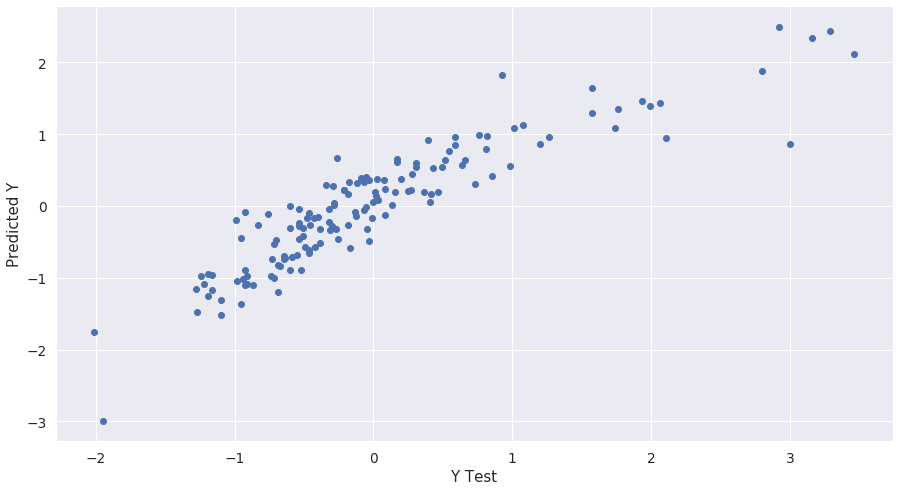

In [0]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [0]:
from sklearn import metrics

In [0]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.3047463476695893
MSE: 0.17691991288542952
RMSE: 0.4206184885206896


<a id="1"></a> <br>
# **Gradient Boosting Regression **


In [0]:
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score

In [0]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
clf_pred=clf.predict(X_test)
clf_pred= clf_pred.reshape(-1,1)

In [0]:
print('MAE:', metrics.mean_absolute_error(y_test, clf_pred))
print('MSE:', metrics.mean_squared_error(y_test, clf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, clf_pred)))

MAE: 0.2285837860566597
MSE: 0.12077285836239446
RMSE: 0.3475238961026917


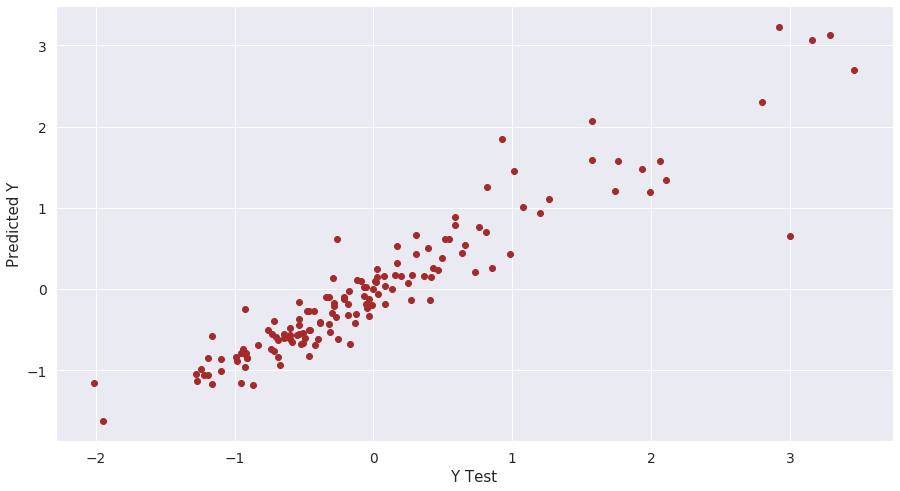

In [0]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,clf_pred, c= 'brown')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

<a id="1"></a> <br>
# **Decision Tree Regression **


L'arbre de décision est un modèle d'apprentissage machine simple pour commencer les tâches de régression.


In [0]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state = 100)
dtreg.fit(X_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=100, splitter='best')

In [0]:
dtr_pred = dtreg.predict(X_test)
dtr_pred= dtr_pred.reshape(-1,1)

In [0]:
print('MAE:', metrics.mean_absolute_error(y_test, dtr_pred))
print('MSE:', metrics.mean_squared_error(y_test, dtr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))

MAE: 0.33093256857692027
MSE: 0.23066323908821876
RMSE: 0.48027412910567935


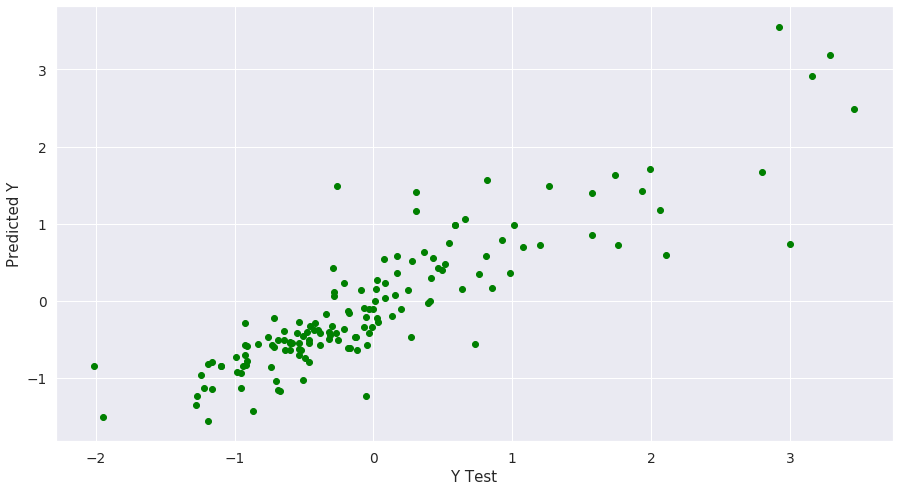

In [0]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,dtr_pred,c='green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

<a id="1"></a> <br>
# **Support Vector Machine Regression **

In [0]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
svr_pred = svr.predict(X_test)
svr_pred= svr_pred.reshape(-1,1)

In [0]:
print('MAE:', metrics.mean_absolute_error(y_test, svr_pred))
print('MSE:', metrics.mean_squared_error(y_test, svr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))

MAE: 0.22557015687809456
MSE: 0.11194136513127821
RMSE: 0.3345763965543269


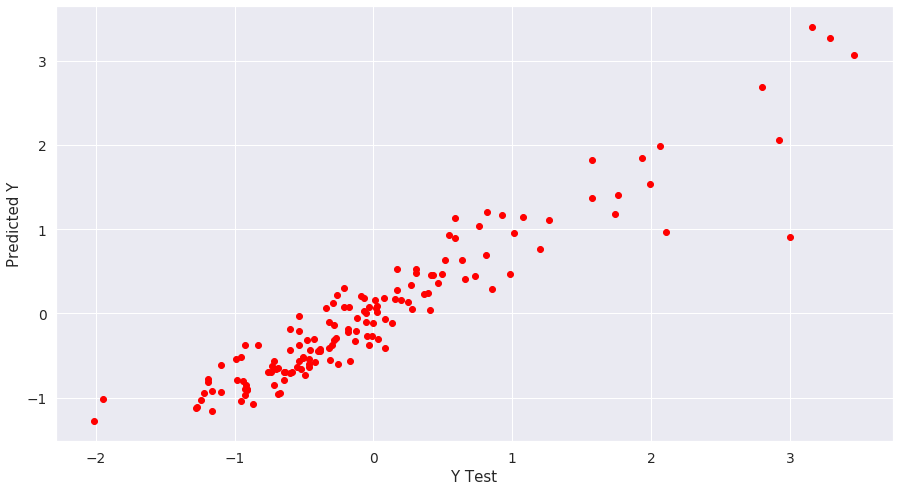

In [0]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,svr_pred, c='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

<a id="1"></a> <br>
# **Random Forest Regression **

In [0]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 1500, random_state = 0)
rfr.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1500, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [0]:
rfr_pred= rfr.predict(X_test)
rfr_pred = rfr_pred.reshape(-1,1)

In [0]:
print('MAE:', metrics.mean_absolute_error(y_test, rfr_pred))
print('MSE:', metrics.mean_squared_error(y_test, rfr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))

MAE: 0.23586026645716177
MSE: 0.127641344833102
RMSE: 0.35726928895876564


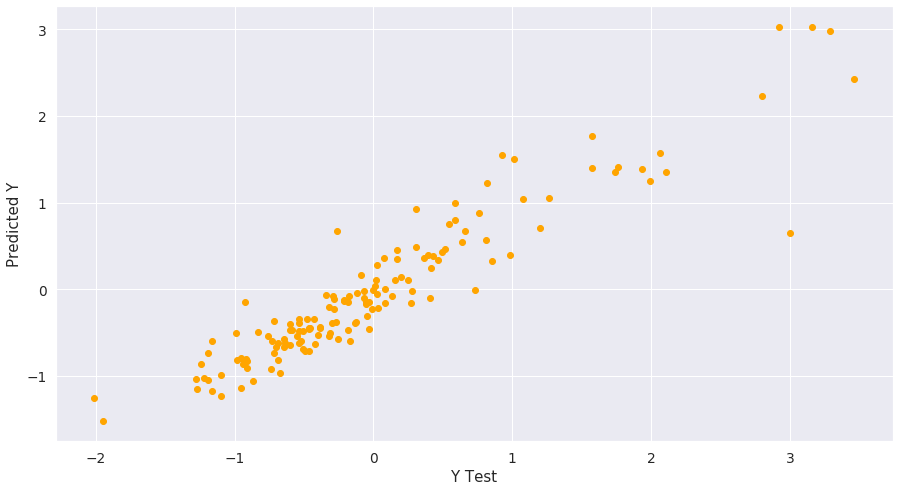

In [0]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,rfr_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

 Nous allons voir le taux d'erreur. Lequel est le meilleur ?

1.   Élément de liste
2.   Élément de liste



In [0]:
error_rate=np.array([metrics.mean_squared_error(y_test, predictions),metrics.mean_squared_error(y_test, clf_pred),metrics.mean_squared_error(y_test, dtr_pred),metrics.mean_squared_error(y_test, svr_pred),metrics.mean_squared_error(y_test, rfr_pred)])

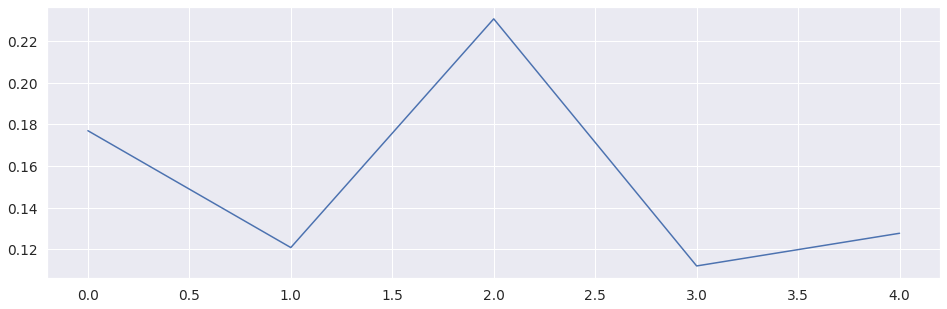

In [0]:
plt.figure(figsize=(16,5))
plt.plot(error_rate)

In [0]:
a = pd.read_csv('/content/drive/My Drive/Deep Learning/house-prices-advanced-regression-techniques/test.csv')

In [0]:
test_id = a['Id']
a = pd.DataFrame(test_id, columns=['Id'])

In [0]:
test = sc_X.fit_transform(test)

In [0]:
test.shape

(1459, 14)

In [0]:
test_prediction_clf=clf.predict(test)
test_prediction_clf= test_prediction_clf.reshape(-1,1)

In [0]:
test_prediction_clf

array([[-0.68723269],
       [-0.50190102],
       [ 0.00841754],
       ...,
       [-0.27678966],
       [-0.77459031],
       [ 0.83163958]])

In [0]:
test_prediction_clf =sc_y.inverse_transform(test_prediction_clf)

In [0]:
test_prediction_clf = pd.DataFrame(test_prediction_clf, columns=['SalePrice'])

In [0]:
test_prediction_clf.head()

,SalePrice
0,129080.967202
1,142282.152206
2,178632.171165
3,180852.275453
4,198584.678690


In [0]:
result = pd.concat([a,test_prediction_clf], axis=1)

In [0]:
result.head()

,Id,SalePrice
0,1461,129080.967202
1,1462,142282.152206
2,1463,178632.171165
3,1464,180852.275453
4,1465,198584.678690


In [0]:
result.to_csv('submission.csv',index=False)

# Neural Network

In [0]:
import keras

Using TensorFlow backend.


In [0]:
cols = ['SalePrice','OverallQual', 'GrLivArea', 'GarageCars', 'FullBath', 'YearBuilt']
df_train = train[cols]
# Create dummy values
df_train = pd.get_dummies(df_train)
#filling NA's with the mean of the column:
df_train = df_train.fillna(df_train.mean())
# Always standard scale the data before using NN
scale = StandardScaler()
X_train = df_train[['OverallQual', 'GrLivArea', 'GarageCars', 'FullBath', 'YearBuilt']]
X_train = scale.fit_transform(X_train)
# Y is just the 'SalePrice' column
y = df_train['SalePrice'].values
seed = 7
np.random.seed(seed)
# split into 67% for train and 33% for test
X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size=0.33, random_state=seed)

In [0]:
from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import l1
from keras.layers.normalization import BatchNormalization
from keras import backend as K
from keras import metrics



model = Sequential()
model.add(Dense(40, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dense(40, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                240       
_________________________________________________________________
dense_2 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 41        
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer = 'adam', loss = 'mean_squared_logarithmic_error')

In [0]:
#Training the model
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 60, verbose = 1, validation_split = 0.1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 880 samples, validate on 98 samples
Epoch 1/100





880/880 [==============================] - 0s 330us/step - loss: 144.3925 - val_loss: 146.2169
Epoch 2/100
880/880 [==============================] - 0s 27us/step - loss: 144.3925 - val_loss: 146.2169
Epoch 3/100
880/880 [==============================] - 0s 28us/step - loss: 144.3925 - val_loss: 146.2169
Epoch 4/100
880/880 [==============================] - 0s 27us/step - loss: 144.3925 - val_loss: 146.2169
Epoch 5/100
880/880 [==============================] - 0s 25us/step - loss: 144.3925 - val_loss: 146.2169
Epoch 6/100
880/880 [==============================] - 0s 30us/step - loss: 144.3925 - val_loss: 146.2169
Epoch 7/100
880/880 [==============================] - 0s 32us/step - loss: 144.3925 - val_loss: 146.2169
Epoch 8/100
880/880 [==============================] - 0s 36us/step - loss: 144.3925 - val_loss: 146.2169
Epoc

In [0]:
epochs_hist.history.keys()

dict_keys(['val_loss', 'loss'])

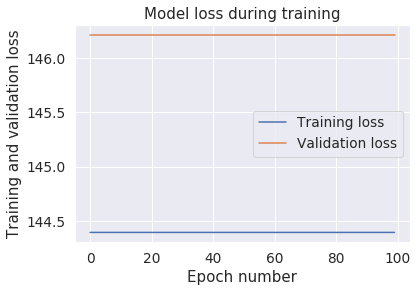

In [0]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model loss during training')
plt.xlabel('Epoch number')
plt.ylabel('Training and validation loss')
plt.legend(['Training loss', 'Validation loss'])

In [0]:
y_predict = model.predict(X_test)
predicted = [item for sublist in y_predict for item in sublist]
predicted

[-0.36128038,
 -0.18548617,
 -0.24073285,
 -0.5351157,
 -0.50646025,
 -0.4333169,
 -0.2527737,
 -0.5482094,
 -0.67747235,
 -0.571912,
 -0.40514946,
 -0.22376019,
 -0.9215045,
 -0.33294708,
 -0.20021692,
 -0.20702983,
 -0.29782593,
 -0.36930147,
 -0.76202273,
 -0.44421452,
 -0.33587733,
 -0.35070524,
 -0.79766726,
 -0.340469,
 -0.48817265,
 -1.4230114,
 -0.8384341,
 -0.3323695,
 -0.39360666,
 -0.6643115,
 -0.3596234,
 -0.27342772,
 -0.19753924,
 -0.4405533,
 -0.22414443,
 -0.61391073,
 -0.6062012,
 -0.3429605,
 -0.4785872,
 -0.21471885,
 -0.6629043,
 -0.33571833,
 -0.43566018,
 -1.427677,
 -0.13702077,
 -0.43601286,
 -0.32997075,
 -0.5168635,
 -0.4799479,
 -0.29154542,
 -0.4574604,
 -0.46240616,
 -0.24286672,
 -0.3349375,
 -0.7165371,
 -1.0827382,
 -0.4725232,
 -0.5709373,
 -0.346606,
 -0.33162543,
 -0.48453775,
 -0.41671503,
 -0.7058532,
 -0.5741935,
 -0.47516197,
 -0.3297281,
 -0.6007352,
 -0.21900178,
 -0.33044028,
 -0.5188339,
 -0.31495255,
 -0.33571833,
 -0.61556756,
 -0.7534047,
 